### 1. 신경망 구성
우리 뇌 속의 신경망 구조에 착안해서 퍼셉트론(Perceptron)이라는 형태를 제안하며 이를 연결한 형태를 인공신경망(Artificial Neural Network)이라고 부르기 시작했습니다.

#### 1-1. MNIST Revisited

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 1s 778us/step - loss: 0.4931 - accuracy: 0.8828
Epoch 2/10
1875/1875 [==============================] - 1s 752us/step - loss: 0.2292 - accuracy: 0.9351
Epoch 3/10
1875/1875 [==============================] - 1s 778us/step - loss: 0.1797 - accuracy: 0.9482
Epoch 4/10
1875/1875 [==============================] - 2s 808us/step - loss: 0.1506 - accuracy: 0.9567
Epoch 5/10
1875/1875 [==============================] - 1s 756us/step - loss: 0.1301 - accuracy: 0

#### 1-2. 다층 퍼셉트론

총 3개의 레이어로 구성되된 퍼셉트론을 나타냅니다. 위에서 보았던 예시 코드와도 동일합니다. 은닉층에는 H개의 노드이, 출력층에는 K개의 노드가 존재하는 인공신경망을 표현한 것입니다. (+1 부분은 bias를 뜻하는 부분이므로 이전 레이어와의 연결이 없습니다. ) 위의 코드에서는 H=50, K=10, 그리고 입력층 노드 개수 d=784로 정의되었습니다.
https://funnypr.tistory.com/entry/The-Basic-Artificial-Neuron-Bias-neuron

- 위의 이미지를 보면 입력값이 있는 입력층(input layer), 최종 출력값이 있는 출력층(output layer), 그리고 그 사이에 있는 층인 은닉층(hidden layer)이 있습니다. 보통 입력층과 출력층 사이에 몇 개의 층이 존재하든 모두 은닉층이라고 부릅니다.

- 보통 그림으로 인공신경망을 표현할 때에는 노드를 기준으로 레이어를 표시해서 3개의 레이어라고 생각할 수 있지만, 실제로는 총 2개의 레이어를 가졌습니다. 레이어 개수를 셀 때에는 노드와 노드 사이의 연결하는 부분이 몇 개 존재하는지 세면 보다 쉽게 알 수 있습니다.

- 이렇게 인공신경망이 어떻게 생겼는지 대략 알아봤는데요. 인공신경망 중에서도 위의 이미지처럼 2개 이상의 레이어를 쌓아서 만든 것을 보통 다층 퍼셉트론(Multi-Layer Perceptron; MLP)라고 부릅니다. 그리고 입력층, 출력층을 제외한 은닉층이 많아지면 많아질수록 인공신경망이 DEEP 해졌다고 이야기합니다.

- 우리가 지금 알아보려고 하는 딥러닝이 바로 이 인공신경망이 DEEP해졌다는 뜻에서 나온 단어입니다. 그래서 우리가 하려는 딥러닝은 충분히 깊은 인공신경망을 활용하며 이를 보통 다른 단어로 DNN(Deep Neural Network)라고 부릅니다.

**Fully-Connected Nertaul Network**

MLP의 다른 용어로, Fully-Connnected Nerual Network는 서로 다른 층에 위치한 노드 간에는 연결 관계가 존재하지 않으며, 인접한 층에 위치한 노드들 간의 연결만 존재한다는 의미를 내포합니다.

#### 1-3. Parameters/Weights
- 입력층-은닉층, 은닉층-출력층 사이에는 각가 행력이 존재한다.
- 입력값이 100개, 은닉 노드가 20개라면, 100X20 형태를 가진 행렬이 존재한다.
- 출력층이 10개의 노드를 가진다면, 은닉층-출력층 사이에는 20X10 형태를 가진 행렬이 존재한다.
- 이 행렬들을 파라미터 혹은 웨이트라고 부른다. 보통 같은 뜻으로 사용되지만, 실제로 파라미터에는 bias 노드도 포함된다.

$y = W * X + b$

#### MLP 기반 딥러닝 모델을 Numpy로 다시 만들기

In [2]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [3]:
weight_init_std = 0.1
input_size = 784
hidden_size=50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [4]:
# 첫번째 데이터의 은닉층 출력
a1[0]

array([-4.25637516e-01,  1.25647762e+00, -1.29578927e+00, -2.50634033e-01,
        1.19123032e+00,  9.54569677e-02, -6.16784358e-01,  4.49809989e-02,
        1.19927191e+00,  8.19375163e-01,  6.21815372e-01,  9.81901661e-01,
        7.45971979e-01,  1.44222493e+00, -8.92543279e-01,  1.28425893e+00,
       -1.33728070e-01,  2.64309347e-01,  9.19180051e-01, -6.11430700e-01,
        3.07208499e-01, -2.09713969e-01, -1.01650476e-01,  5.28805574e-01,
        6.24988001e-01,  5.74697254e-01, -7.84530234e-03,  2.94126816e-01,
       -1.98250552e+00, -2.86091344e-01, -1.13633407e+00, -4.26799364e-01,
        1.05108412e+00, -1.66291442e+00,  3.54452132e-01, -6.75015611e-01,
        6.18215905e-01,  2.19635502e-01, -1.12104666e-01, -2.98554398e-01,
        8.38527240e-01, -5.14232360e-01,  6.76068102e-04, -1.41123751e+00,
        1.31662291e+00,  1.85668388e+00,  1.61593909e+00, -4.19229051e-01,
       -9.91191995e-01,  8.62365820e-01])

### 2. 활성화 함수와 손실 함수
#### 2-1. 활성화 함수 (Activation Functions)
딥러닝에서는 이 활성화 함수의 존재가 필수적입니다. 다소 수학적인 이유가 있지만, 간단히 설명하자면 이 활성화 함수는 보통 비선형 함수를 사용합니다. 그리고 이 비선형 함수를 MLP 안에 포함시키면서 모델의 표현력이 좋아지게 됩니다. (정확히는 이 비선형 함수가 포함되지 않으면 한 층을 가진 MLP와 다른 점이 없습니다.)

#### 1) Sigmoid
$σ(x)=\frac{1}{1+e^{−x}}$

In [6]:
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))

In [7]:
# 위 수식의 sigmoid 함수를 구현해 봅니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 엘리먼트가 0에서 1사이

[0.39516853 0.77841915 0.21487453 0.43766745 0.76696103 0.52384614
 0.35051315 0.51124335 0.76839523 0.69410369 0.65063131 0.72748538
 0.67830038 0.80879896 0.29058526 0.78317387 0.46661772 0.56569533
 0.71487501 0.3517329  0.57620374 0.44776282 0.47460924 0.62920449
 0.65135214 0.63984633 0.49803868 0.57300614 0.121052   0.42896104
 0.24299407 0.39489087 0.74098303 0.15937116 0.58769679 0.33737467
 0.64981268 0.5546892  0.47200315 0.42591091 0.69815495 0.37420189
 0.50016902 0.19603894 0.7886193  0.86490996 0.83423432 0.39670125
 0.2706767  0.7031547 ]


**단점**
- Gradient Vanishing 현상이 발생한다.
- exp 함수 사용시 비용이 크다.

#### 2) tanh
$tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$

- tanh 함수는 함수의 중심값을 0으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제를 해결.
- gradient vanishing 문제 존재.

#### 3) ReLU
$f(x)=max(0,x)$
- sigmoid, tanh 함수와 비교 시 학습 빠름.
- 연산 비용이 크지 않고, 구현이 매우 간단하다.

In [8]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

print('go~')

go~


In [9]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[-0.67301816 -0.08848628  0.23114498 -0.13141477 -0.62625858 -0.80826509
 -0.20637871 -0.18166718  0.28067251  0.20866228]


In [10]:
# 최종 출력인 a2에 softmax 함수 적용하면 입력 x가 10가지 숫자 중 하나일 확률의 형태로 가공
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [11]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.05833108, 0.10465476, 0.14406984, 0.10025715, 0.06112339,
       0.05095221, 0.09301628, 0.09534349, 0.15138491, 0.1408669 ])

#### 2-2. 손실함수
이렇게 비선형 활성화 함수를 가진 여러 개의 은닉층을 거친 다음 신호 정보들은 출력층으로 전달됩니다. 이 때 우리가 원하는 정답과 전달된 신호 정보들 사이의 차이를 계산하고, 이 차이를 줄이기 위해 각 파라미터들을 조정하는 것이 딥러닝의 전체적인 학습 흐름입니다.

이 차이를 구하는데 사용되는 함수는 손실함수(Loss function) 또는 비용함수(Cost function)라고 부릅니다. 대표적으로 다음과 같은 두 가지 손실함수가 존재합니다.

#### 1) 평균제곱오차 (MSE; Mean Square Error)
${MSE} ={\frac{1}{n}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.}$

#### 2) 교차 엔트로피 (Cross Entropy)
Cross Entropy는 두 확률분포 사이의 유사도가 클수록 작아지는 값입니다. 아직 별로 학습되지 않은 현재의 모델이 출력하는 softmax 값 y_hat은 10개의 숫자 각각의 확률이 대부분 0.1 근처를 오가는 정도입니다.

모델을 학습하게 되면, yhat이 점점 정답에 가까워지게 됩니다. 정말 그렇게 되는지 다음 스텝에서 살펴 봅시다. 우선은 yhat과 정답을 비교해 봅시다.

$E= -\sum_{i=1}^{n} {t_{i}\log{y_i}}$

In [12]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_ont_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_ont_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [13]:
print(y_hat[0])
print(t[0])

[0.05833108 0.10465476 0.14406984 0.10025715 0.06112339 0.05095221
 0.09301628 0.09534349 0.15138491 0.1408669 ]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.5800257266168627

### 3. 경사하강법
- 각 단계에서의 기울기를 구해서 해당 기울기가 가리키는 방향으로 이동
- 학습률(learning rate) 이라는 개념을 도입해 기울기 값과 이 학습률을 곱한 만큼만 발걸음을 내딛음
- 우리가 발걸음을 잘 내딛는다고 해도 어디서 출발했냐에 따라 산 아래로 내려가는 시간이 빨라질 수도 느려질 수도 있습니다. 이는 parameter의 값들을 어떻게 초기화하는지의 문제

In [15]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.01166622,  0.02093095,  0.02881397,  0.02005143,  0.01222468,
        -0.18980956,  0.01860326,  0.0190687 ,  0.03027698,  0.02817338],
       [-0.18783061,  0.01977652,  0.03169325,  0.01933165,  0.01047892,
         0.01084571,  0.01944427,  0.01612602,  0.03134881,  0.02878547],
       [ 0.01567094,  0.02137537,  0.02472271,  0.02111222, -0.18878449,
         0.01301394,  0.01731175,  0.02129398,  0.03113638,  0.02314719],
       [ 0.01299947, -0.18016127,  0.02557152,  0.02238328,  0.01203243,
         0.00866472,  0.0239688 ,  0.02342641,  0.02490111,  0.02621352],
       [ 0.01352884,  0.022916  ,  0.0257529 ,  0.019132  ,  0.01173028,
         0.01012606,  0.01612668,  0.02119449,  0.03052594, -0.1710332 ]])

In [16]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-0.0360628 , -0.03096036,  0.06947636,  0.05262649, -0.09020019,
        -0.06130265,  0.04813671,  0.05317978,  0.07719846, -0.0820918 ],
       [-0.13007638, -0.07472453,  0.08550373,  0.0625303 , -0.05760146,
        -0.11954193,  0.05995654,  0.06049101,  0.09026534,  0.02319739],
       [-0.0609958 , -0.02513629,  0.07291611,  0.05353231, -0.04192239,
        -0.11984459,  0.04977389,  0.05314339,  0.0790756 , -0.06054223],
       [-0.11105962,  0.02112713,  0.0619358 ,  0.04410132, -0.07383961,
        -0.08555452,  0.04070269,  0.04222913,  0.06717521, -0.00681752],
       [-0.04552547, -0.05793425,  0.05047433,  0.03847827, -0.06288583,
        -0.02981429,  0.0362366 ,  0.03843387,  0.05482484, -0.02228808],
       [-0.01909577, -0.08196351,  0.05616909,  0.04454475, -0.12468372,
        -0.02928922,  0.04161549,  0.04481783,  0.06201206,  0.005873  ],
       [-0.091195  , -0.03327618,  0.0796791 ,  0.05763538, -0.02191468,
        -0.14781003,  0.05434225,  0.05647005

In [17]:
# 파라미터의 기울기 구하기
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

In [18]:
# 중간에 sigmoid가 한번 사용되이ㅓㅆ으므로, 활성화함수에 대한 gradient도 고려
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [19]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [20]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

### 4. 오차역전파법
 출력층의 결과와 내가 뽑고자 하는 target 값과의 차이를 구한 뒤, 그 오차값을 각 레이어들을 지나며 역전파해가며 각 노드가 가지고 있는 변수들을 갱신해 나가는 방식

In [21]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

In [22]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_ont_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.05699076 0.07709802 0.13266616 0.08636175 0.15977549 0.13191561
  0.07067469 0.1164158  0.06519432 0.1029074 ]
 [0.05881493 0.06746346 0.10453152 0.09523672 0.16616693 0.12287557
  0.08487497 0.1078604  0.07171387 0.12046163]
 [0.06155202 0.05921833 0.12657835 0.1025123  0.15401448 0.11871731
  0.0901839  0.10309371 0.0755541  0.1085755 ]
 [0.04772839 0.06962345 0.12647524 0.09290889 0.15048205 0.12535483
  0.08281817 0.1201921  0.05910023 0.12531666]
 [0.05361779 0.06202825 0.14284336 0.09693978 0.14567766 0.12834467
  0.08245937 0.10575103 0.07234995 0.10998814]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.320339547462479


### 5. 모델 학습

In [23]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_ont_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [24]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.0552363  0.06824488 0.06045284 0.04871128 0.22277953 0.06492689
  0.08035606 0.1800316  0.05590786 0.16335275]
 [0.05046855 0.07439738 0.06620984 0.06546154 0.20457022 0.05909326
  0.07679634 0.17286567 0.06494943 0.16518776]
 [0.0621766  0.06684455 0.07991139 0.05664445 0.21590521 0.07316118
  0.09366768 0.13876218 0.06823088 0.14469588]
 [0.05338089 0.07166793 0.0679416  0.04674548 0.2197488  0.07328255
  0.08941646 0.17685725 0.06185091 0.13910812]
 [0.05104303 0.07351477 0.06441476 0.05317175 0.17811762 0.07070521
  0.07890238 0.21638996 0.06279201 0.15094851]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.3560684951034454
---------
[[0.0725755  0.08700549 0.05539366 0.04572903 0.21732357 0.08781475
  0.0709962  0.13630428 0.05145115 0.17540639]
 [0.06938446 0.09378441 0.060943   0.06130692 0.19965504 0.07653959
  0.06837063 0.13172976 0.060

### 6. 추론 과정 구현과 정확도 계산 

In [25]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [26]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 

X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.13290335, 0.14065916, 0.03512943, 0.03055283, 0.17836142,
       0.1743541 , 0.04130808, 0.06121107, 0.03285719, 0.17266338])

In [27]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)
   # t = np.argmax(t, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [28]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_ont_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.13290335 0.14065916 0.03512943 0.03055283 0.17836142 0.1743541
 0.04130808 0.06121107 0.03285719 0.17266338]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.09


### 7. 전체 학습 사이클 수행

In [29]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [30]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.3044652445878393
train acc, test acc | 0.09736666666666667, 0.0982
Loss:  0.7744872573015007
train acc, test acc | 0.7874, 0.7944
Loss:  0.3937297596900746
train acc, test acc | 0.8779333333333333, 0.8818
Loss:  0.2623987987387577
train acc, test acc | 0.89785, 0.9021
Loss:  0.29981509784212973
train acc, test acc | 0.9085666666666666, 0.9098
Loss:  0.19102788704774665
train acc, test acc | 0.9155166666666666, 0.9192
Loss:  0.17035630899838594
train acc, test acc | 0.92025, 0.9244
Loss:  0.3204519637436092
train acc, test acc | 0.9237166666666666, 0.9271
Loss:  0.2645219580592717
train acc, test acc | 0.9272, 0.9309
Loss:  0.30366193742571207
train acc, test acc | 0.9308833333333333, 0.9331
Loss:  0.31446298164167574
train acc, test acc | 0.9346333333333333, 0.9357
Loss:  0.19021138678707566
train acc, test acc | 0.93725, 0.9378
Loss:  0.26490538784495316
train acc, test acc | 0.9399166666666666, 0.9403
Loss:  0.22487685138249972
train acc, test 

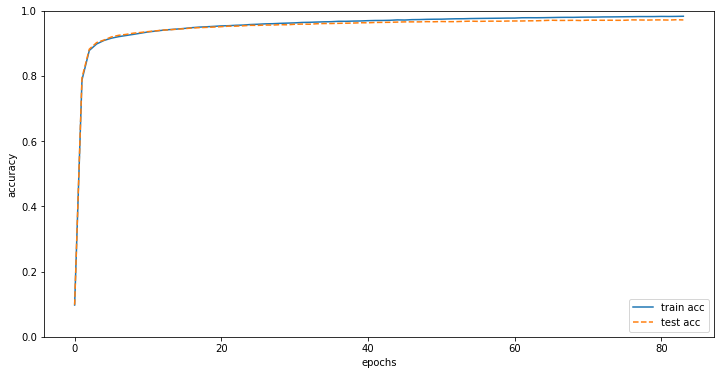

In [31]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

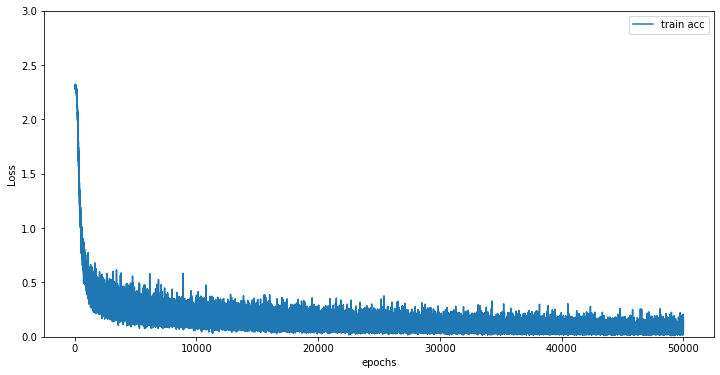

In [32]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()